Internet use and religion in Europe, part four
-----------------------------------------

This notebook presents explorations of the association between Internet use and religion in Europe, using data from the European Social Survey (http://www.europeansocialsurvey.org).

Copyright 2015 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [98]:
from __future__ import print_function, division

import string
import random
import cPickle as pickle

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

import ess

# colors by colorbrewer2.org
RED = '#e41a1c'
BLUE = '#377eb8'
GREEN = '#4daf4a'
PURPLE = '#984ea3'
ORANGE = '#ff7f00'
YELLOW = '#ffff33'
BROWN = '#a65628'
PINK ='#f781bf'

%matplotlib inline

Open the store containing resampled DataFrames.

In [2]:
store = pd.HDFStore('ess.resamples.h5')

Make the country objects

In [93]:
reload(ess)
country_map = ess.make_countries(store)

Austria
Belgium
Bulgaria
Switzerland
Cyprus
Czech Rep
Germany
Denmark
Estonia
Spain
Finland
France
UK
Greece
Croatia
Hungary
Ireland
Israel
Iceland
Italy
Lithuania
Luxembourg
Latvia
Netherlands
Norway
Poland
Portugal
Romania
Russia
Sweden
Slovenia
Slovakia
Turkey
Ukraine


For each resampled frame, run both models and store the results in the Country objects

In [96]:
reload(ess)
FORMULA1 = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + yrbrn60_f2 + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

num = 201
ess.process_all_frames(store, country_map, num,
                       smf.logit, FORMULA1, model_num=1)

0 /AAVZWa
1 /ADbUvD
2 /AJEDdF


In [97]:
reload(ess)
FORMULA2 = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f  + yrbrn60_f2 + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

ess.process_all_frames(store, country_map, num,
                       smf.ols, FORMULA2, model_num=2)

0 /AAVZWa
1 /ADbUvD
2 /AJEDdF


In [100]:
with open('ess4.pkl', 'wb') as fp:
    pickle.dump(country_map, fp)

In [104]:
with open('ess4.pkl', 'rb') as fp:
    country_map = pickle.load(fp)

In [6]:
plot_counter = 1

def save_plot(flag=False):
    """Saves plots in png format.
    
    flag: boolean, whether to save or not
    """
    global plot_counter
    if flag:
        root = 'ess4.%2.2d' % plot_counter
        thinkplot.Save(root=root, formats=['png'])
        plot_counter += 1

Make a plot showing confidence interval for the given parameters

In [7]:
xlabel1 = 'Difference in percentage points of hasrelig'
xlabel2 = 'Difference in religiosity (0-10 scale)'

First let's check on the estimated parameters for the age variables.

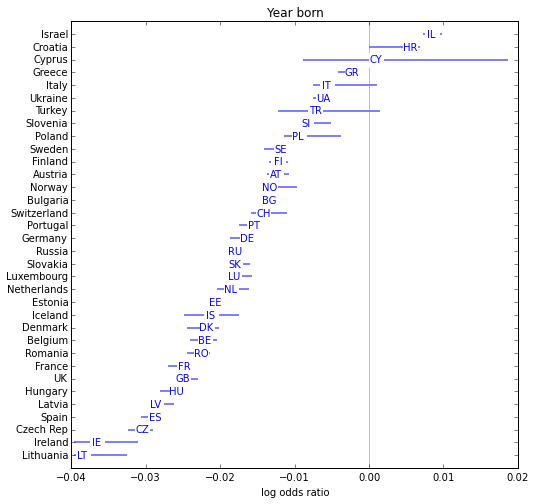

In [103]:
t = ess.extract_vars(country_map, 'yrbrn60_f', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Year born',
                 xlabel='log odds ratio')
save_plot()

In almost every country, year born is associated with less religiosity.

How about the quadratic term?

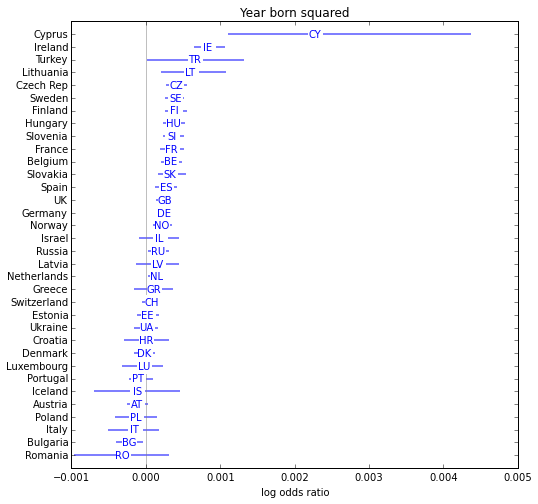

In [9]:
t = ess.extract_vars(country_map, 'yrbrn60_f2', 'hasrelig_f')    
ess.plot_cis(t)
thinkplot.Config(title='Year born squared',
                 xlabel='log odds ratio')
save_plot()

In almost half of the countries, the quadratic term is positive and statistically significant.  That means that the curves are convex up, indicating that the age effect is leveling off.

In [10]:
xlim = [-15, 15]

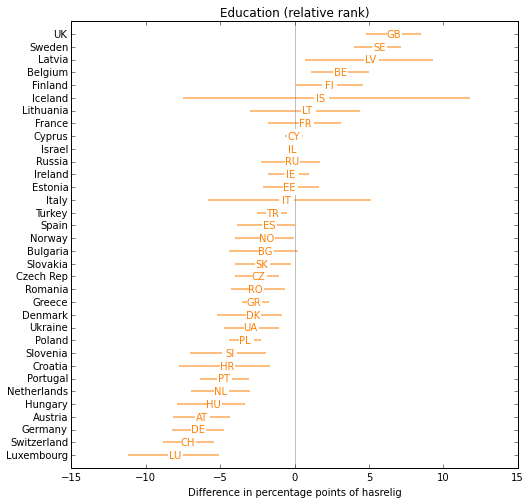

In [11]:
t = ess.extract_ranges(country_map, 'edurank_f', 'hasrelig_f')
ess.plot_cis(t, ORANGE)
thinkplot.Config(title='Education (relative rank)',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

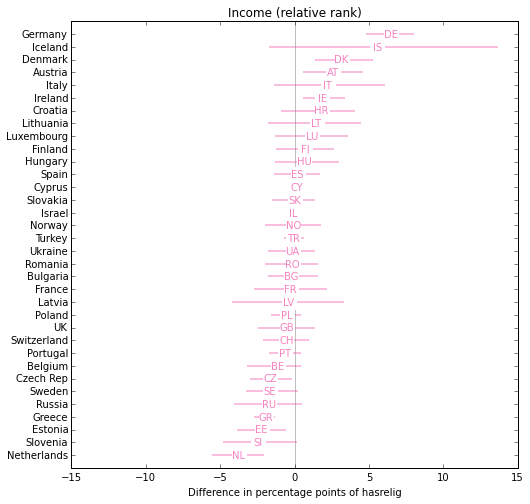

In [12]:
t = ess.extract_ranges(country_map, 'hincrank_f', 'hasrelig_f')
ess.plot_cis(t, PINK)
thinkplot.Config(title='Income (relative rank)',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

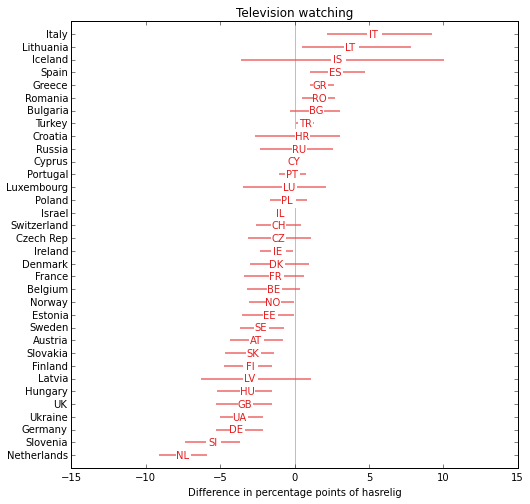

In [13]:
t = ess.extract_ranges(country_map, 'tvtot_f', 'hasrelig_f')
ess.plot_cis(t, RED)
thinkplot.Config(title='Television watching',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

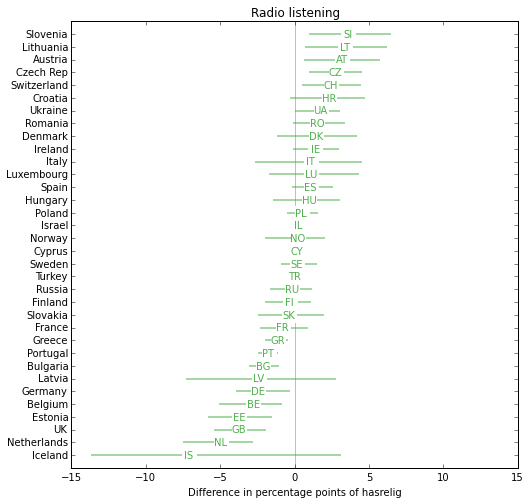

In [14]:
t = ess.extract_ranges(country_map, 'rdtot_f', 'hasrelig_f')
ess.plot_cis(t, GREEN)
thinkplot.Config(title='Radio listening',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

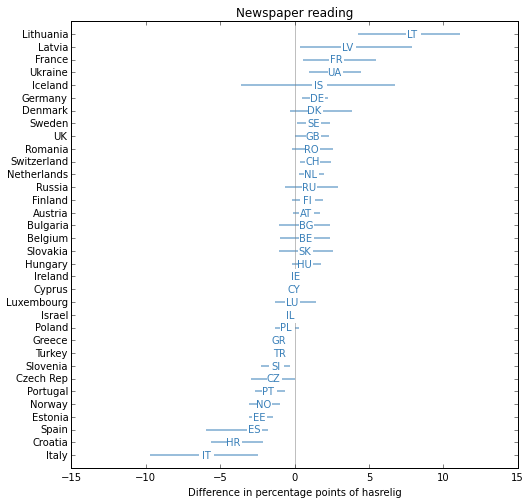

In [15]:
t = ess.extract_ranges(country_map, 'nwsptot_f', 'hasrelig_f')
ess.plot_cis(t, BLUE)
thinkplot.Config(title='Newspaper reading',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

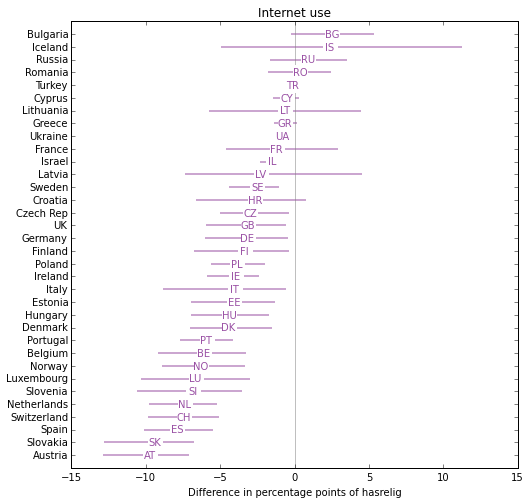

In [16]:
t = ess.extract_ranges(country_map, 'netuse_f', 'hasrelig_f')
ess.plot_cis(t, PURPLE)
thinkplot.Config(title='Internet use',
                 xlabel=xlabel1, xlim=xlim)
save_plot()

0.284977700736


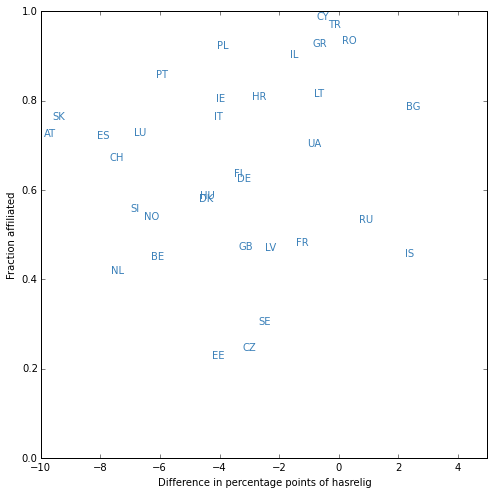

In [17]:
t = ess.extract_ranges(country_map, 'netuse_f', 'hasrelig_f')
ess.plot_scatter(t, BLUE)
thinkplot.Config(title='',
                 xlabel=xlabel1,
                 ylabel='Fraction affiliated',
                 xlim=[-10, 5], ylim=[0, 1])
save_plot()

0.287490738599


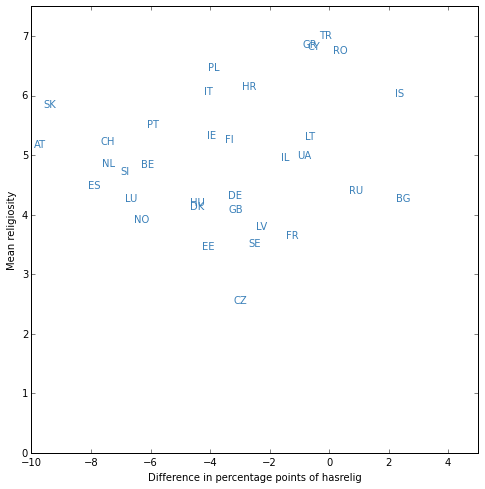

In [18]:
t = ess.extract_ranges(country_map, 'netuse_f', 'rlgdgr_f')
ess.plot_scatter(t, BLUE)
thinkplot.Config(title='',
                 xlabel=xlabel1,
                 ylabel='Mean religiosity',
                 xlim=[-10, 5], ylim=[0, 7.5])
save_plot()

-0.373246953949


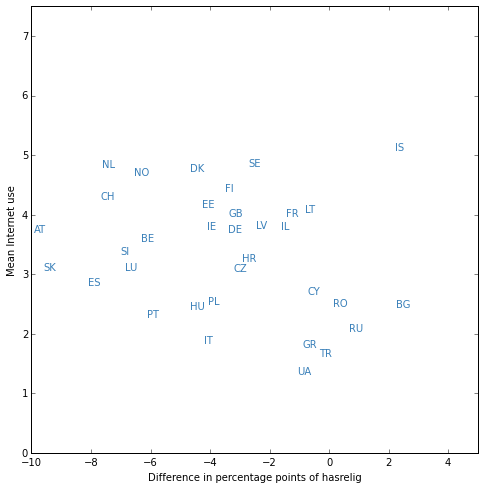

In [19]:
t = ess.extract_ranges(country_map, 'netuse_f', 'netuse_f')
ess.plot_scatter(t, BLUE)
thinkplot.Config(title='',
                 xlabel=xlabel1,
                 ylabel='Mean Internet use',
                 xlim=[-10, 5], ylim=[0, 7.5])
save_plot()

Plot the CDFs of effect size across countries

-3.01898640889 -3.66785514736
-1.70979162373 -1.98344258329
-0.919565691217 -1.20968395118
0.272789472899 -0.0519636614825
-0.284732812276 0.199308543746
0.193052267314 0.250370849898
1.08017398677 0.668283461214
-7.47621219513 -8.38166668947


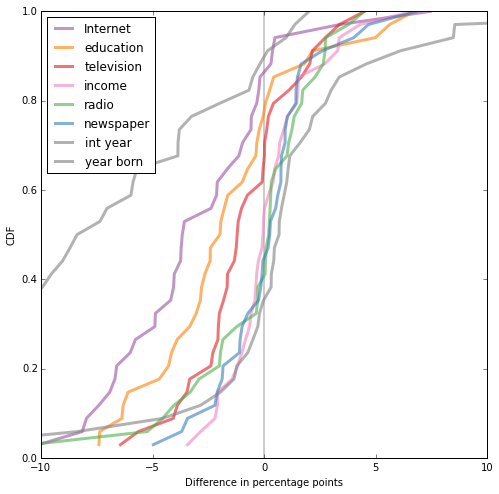

In [105]:
reload(ess)
cdfnames = ['netuse_f', 'edurank_f', 'tvtot_f', 'hincrank_f',
            'rdtot_f', 'nwsptot_f',
            'inwyr07_f', 'yrbrn60_f']
ess.plot_cdfs(country_map, ess.extract_ranges, cdfnames=cdfnames)
thinkplot.Config(xlabel='Difference in percentage points',
                 xlim=[-10, 10],
                 ylabel='CDF',
                 legend=True,
                 loc='upper left')
save_plot()

Make similar figures for the second model, with degree of religiosity as the dependent variable.

In [21]:
xlim = [-2.5, 1.0]

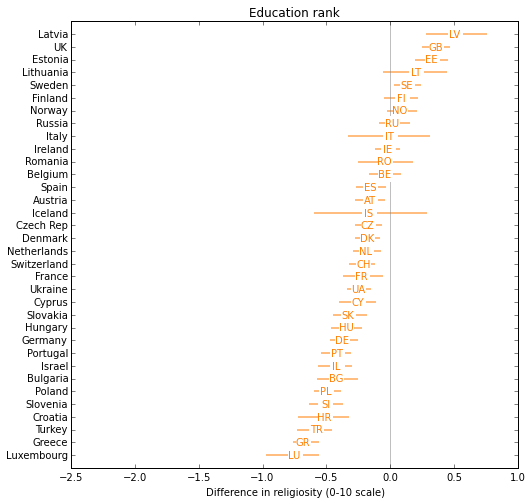

In [22]:
t = ess.extract_ranges2(country_map, 'edurank_f', 'rlgdgr_f')
ess.plot_cis(t, ORANGE)
thinkplot.Config(title='Education rank',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

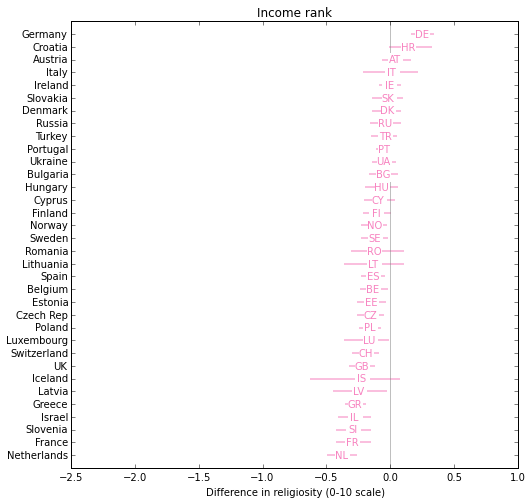

In [23]:
t = ess.extract_ranges2(country_map, 'hincrank_f', 'hasrelig_f')
ess.plot_cis(t, PINK)
thinkplot.Config(title='Income rank',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

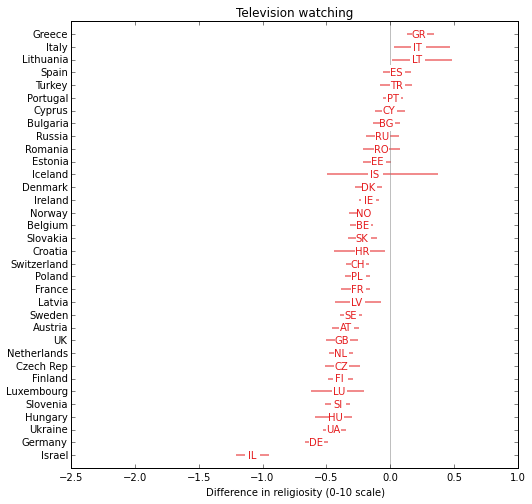

In [24]:
t = ess.extract_ranges2(country_map, 'tvtot_f', 'hasrelig_f')
ess.plot_cis(t, RED)
thinkplot.Config(title='Television watching',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

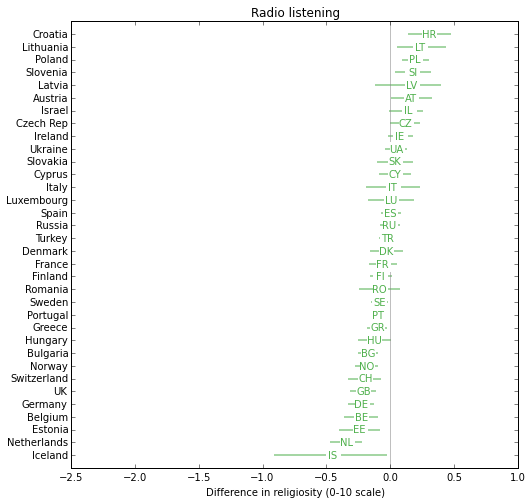

In [25]:
t = ess.extract_ranges2(country_map, 'rdtot_f', 'hasrelig_f')
ess.plot_cis(t, GREEN)
thinkplot.Config(title='Radio listening',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

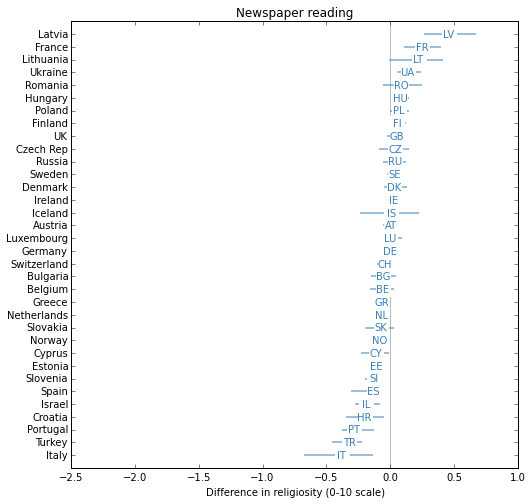

In [26]:
t = ess.extract_ranges2(country_map, 'nwsptot_f', 'hasrelig_f')
ess.plot_cis(t, BLUE)
thinkplot.Config(title='Newspaper reading',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

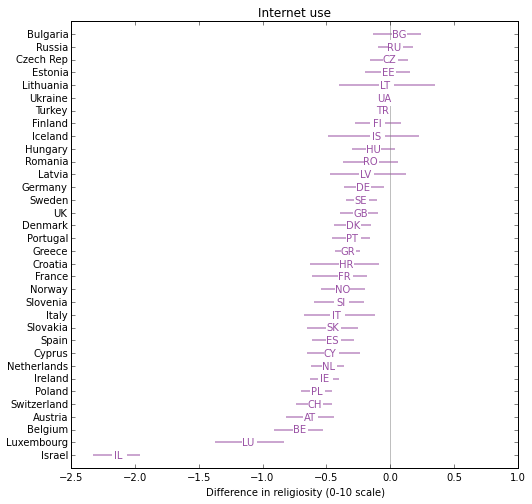

In [27]:
t = ess.extract_ranges2(country_map, 'netuse_f', 'hasrelig_f')
ess.plot_cis(t, PURPLE)
thinkplot.Config(title='Internet use',
                 xlabel=xlabel2,
                 xlim=xlim)
save_plot()

-0.364131535928 -0.342939334565
-0.193279324438 -0.181398006818
-0.226731125166 -0.276944482655
-0.102228631817 -0.114896435503
-0.0353309752759 -0.0218030496612
-0.0194685524894 -0.0502441532217
0.0252767208513 0.00714031425964
-0.525526052287 -0.644442478632


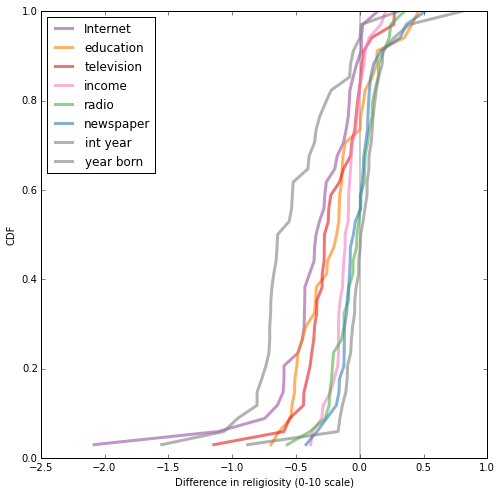

In [106]:
cdfnames = ['netuse_f', 'edurank_f', 'tvtot_f', 'hincrank_f',
            'rdtot_f', 'nwsptot_f',
            'inwyr07_f', 'yrbrn60_f']
ess.plot_cdfs(country_map, ess.extract_ranges2, cdfnames=cdfnames)
thinkplot.Config(xlabel=xlabel2,
                 xlim=[-2.5, 1],
                 ylabel='CDF',
                 loc='upper left')
save_plot()

Here's the scatter plot of effect size on rlgdgr versus mean value of rlgdgr

rlgdgr is on a 0 to 10 scale, so it is mildly astonishing that national means vary as much as they do, from 2.5 to 7. 

-0.224926559226


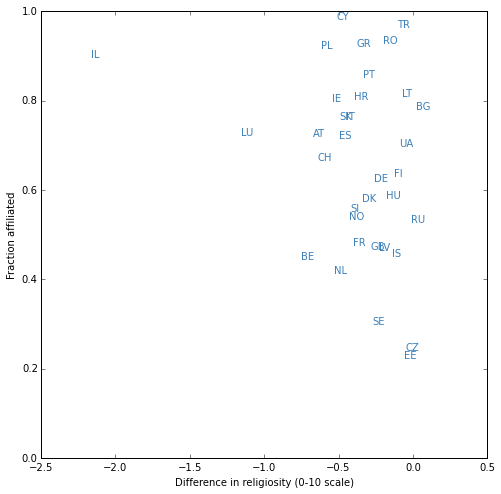

In [29]:
t = ess.extract_ranges2(country_map, 'netuse_f', 'hasrelig_f')
ess.plot_scatter(t, BLUE)
thinkplot.Config(title='',
                 xlabel=xlabel2,
                 ylabel='Fraction affiliated',
                 xlim=[-2.5, 0.5], ylim=[0, 1]
                )
save_plot()

-0.223733104613


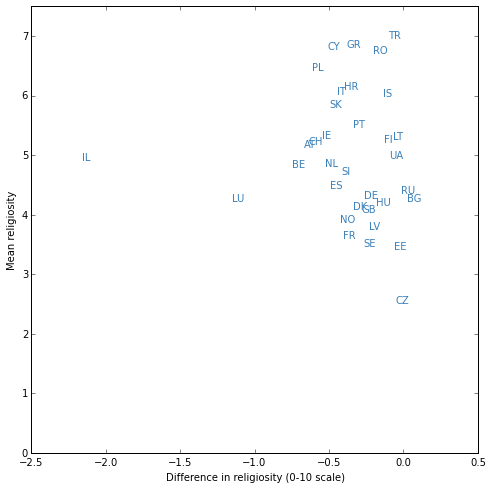

In [30]:
t = ess.extract_ranges2(country_map, 'netuse_f', 'rlgdgr_f')
ess.plot_scatter(t, BLUE)
thinkplot.Config(title='',
                 xlabel=xlabel2,
                 ylabel='Mean religiosity',
                 xlim=[-2.5, 0.5], ylim=[0, 7.5]
                )
save_plot()

-0.0624702811611


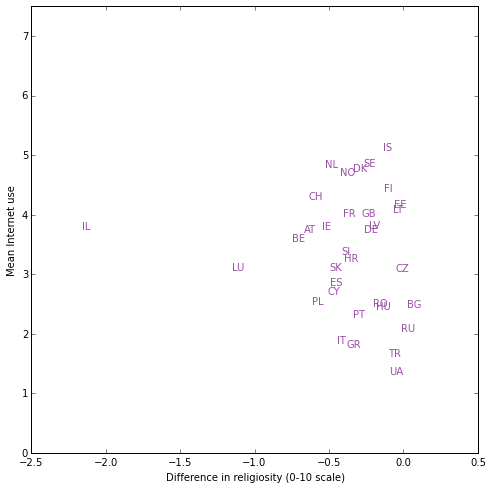

In [31]:
t = ess.extract_ranges2(country_map, 'netuse_f', 'netuse_f')
ess.plot_scatter(t, PURPLE)
thinkplot.Config(title='',
                 xlabel=xlabel2,
                 ylabel='Mean Internet use',
                 xlim=[-2.5, 0.5], ylim=[0, 7.5])
save_plot()

In [85]:
reload(ess)
varnames = ['inwyr07_f', 'yrbrn60_f', 'netuse_f', 'edurank_f', 
            'tvtot_f', 'hincrank_f', 'rdtot_f', 'nwsptot_f']

ts = ess.make_table(country_map, varnames, ess.extract_ranges)
ess.print_table(ts)

varname  	neg*  	neg  	pos  	pos*
---------  	----  	---  	---  	----
yrbrn60_f  	28  	3  	2  	1  	34
netuse_f  	24  	6  	4  	0  	34
edurank_f  	18  	8  	3  	5  	34
tvtot_f  	14  	10  	4  	6  	34
nwsptot_f  	9  	5  	11  	9  	34
rdtot_f  	8  	7  	13  	6  	34
hincrank_f  	4  	16  	10  	4  	34
inwyr07_f  	3  	9  	12  	10  	34


In [86]:
ts = ess.make_table(country_map, varnames, ess.extract_ranges2)
ess.print_table(ts)

varname  	neg*  	neg  	pos  	pos*
---------  	----  	---  	---  	----
yrbrn60_f  	31  	2  	0  	1  	34
netuse_f  	24  	8  	2  	0  	34
tvtot_f  	22  	6  	3  	3  	34
edurank_f  	21  	5  	4  	4  	34
hincrank_f  	16  	14  	3  	1  	34
rdtot_f  	12  	7  	10  	5  	34
nwsptot_f  	12  	5  	13  	4  	34
inwyr07_f  	3  	11  	12  	8  	34


In [90]:
reload(ess)
r = ess.Range(0, 1, 2, 3, 4, 5)

['__doc__',
 '__init__',
 '__module__',
 '__slots__',
 'high',
 'high_var',
 'low',
 'low_var',
 'middle',
 'width']